In [24]:
import pandas as pd
df=pd.read_csv('SeaPlaneTravel.csv')
df

,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121
...,...,...
139,2015-08,606
140,2015-09,508
141,2015-10,461
142,2015-11,390


<AxesSubplot:>

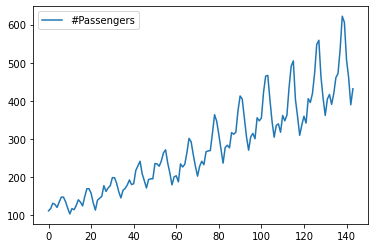

In [25]:
df.plot()

In [26]:
df['Month']=pd.to_datetime(df['Month'])
df['Month']

0     2003-01-01
1     2003-02-01
2     2003-03-01
3     2003-04-01
4     2003-05-01
         ...    
139   2015-08-01
140   2015-09-01
141   2015-10-01
142   2015-11-01
143   2015-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [27]:
df

,Month,#Passengers
0,2003-01-01,112
1,2003-02-01,118
2,2003-03-01,132
3,2003-04-01,129
4,2003-05-01,121
...,...,...
139,2015-08-01,606
140,2015-09-01,508
141,2015-10-01,461
142,2015-11-01,390


In [28]:
df.set_index('Month',inplace=True)


<AxesSubplot:xlabel='Month'>

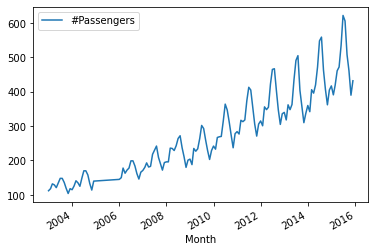

In [29]:
df.plot()

C:\Users\hp\AppData\Local\Temp/ipykernel_9000/4054138434.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decom=seasonal_decompose(df['#Passengers'],freq=12)


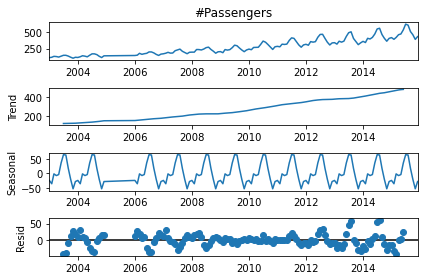

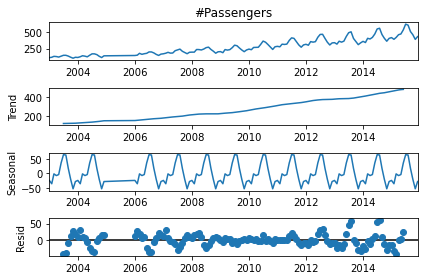

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom=seasonal_decompose(df['#Passengers'],freq=12)
decom.plot()

In [31]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['#Passengers'])

(0.8153688792060552,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [32]:
def check(time_series):
    result=adfuller(time_series)
    print('ADF TEST DETAILS')
    labels=['adf test statistic','p.value','#lags','no.of obs']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1]<=0.05:
        print('stationarity')
    else:
        print('Not stationarity')

In [33]:
check(df['#Passengers'])

ADF TEST DETAILS
adf test statistic:0.8153688792060552
p.value:0.9918802434376411
#lags:13
no.of obs:130
Not stationarity


In [34]:
df['#Passengers first diff']=df['#Passengers']-df['#Passengers'].shift(1)

In [35]:
df

,#Passengers,#Passengers first diff
Month,,
2003-01-01,112,NaN
2003-02-01,118,6.0
2003-03-01,132,14.0
2003-04-01,129,-3.0
2003-05-01,121,-8.0
...,...,...
2015-08-01,606,-16.0
2015-09-01,508,-98.0
2015-10-01,461,-47.0


In [36]:
check(df['#Passengers first diff'].dropna())

ADF TEST DETAILS
adf test statistic:-2.8292668241699905
p.value:0.05421329028382671
#lags:12
no.of obs:130
Not stationarity


In [37]:
df['#Passengers second diff']=df['#Passengers first diff']-df['#Passengers first diff'].shift(1)

In [38]:
df

,#Passengers,#Passengers first diff,#Passengers second diff
Month,,,
2003-01-01,112,NaN,NaN
2003-02-01,118,6.0,NaN
2003-03-01,132,14.0,8.0
2003-04-01,129,-3.0,-17.0
2003-05-01,121,-8.0,-5.0
...,...,...,...
2015-08-01,606,-16.0,-103.0
2015-09-01,508,-98.0,-82.0
2015-10-01,461,-47.0,51.0


In [39]:
check(df['#Passengers second diff'].dropna())

ADF TEST DETAILS
adf test statistic:-16.384231542468516
p.value:2.7328918500141235e-29
#lags:11
no.of obs:130
stationarity


In [40]:
df['seasonal first diff']=df['#Passengers']-df['#Passengers'].shift(12)

In [41]:
print(df.to_string())

            #Passengers  #Passengers first diff  #Passengers second diff  seasonal first diff
Month                                                                                        
2003-01-01          112                     NaN                      NaN                  NaN
2003-02-01          118                     6.0                      NaN                  NaN
2003-03-01          132                    14.0                      8.0                  NaN
2003-04-01          129                    -3.0                    -17.0                  NaN
2003-05-01          121                    -8.0                     -5.0                  NaN
2003-06-01          135                    14.0                     22.0                  NaN
2003-07-01          148                    13.0                     -1.0                  NaN
2003-08-01          148                     0.0                    -13.0                  NaN
2003-09-01          136                   -12.0             

In [42]:
df

,#Passengers,#Passengers first diff,#Passengers second diff,seasonal first diff
Month,,,,
2003-01-01,112,NaN,NaN,NaN
2003-02-01,118,6.0,NaN,NaN
2003-03-01,132,14.0,8.0,NaN
2003-04-01,129,-3.0,-17.0,NaN
2003-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
2015-08-01,606,-16.0,-103.0,47.0
2015-09-01,508,-98.0,-82.0,45.0
2015-10-01,461,-47.0,51.0,54.0


In [43]:
check(df['seasonal first diff'].dropna())

ADF TEST DETAILS
adf test statistic:-3.38302072649248
p.value:0.011551493085515008
#lags:1
no.of obs:130
stationarity


In [44]:
###ACF

C:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


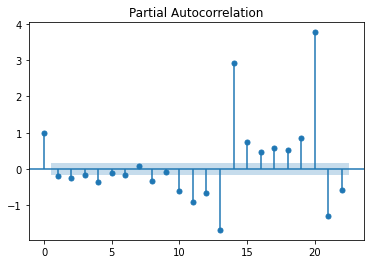

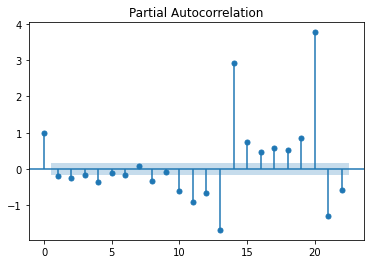

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(df['#Passengers second diff'].dropna())

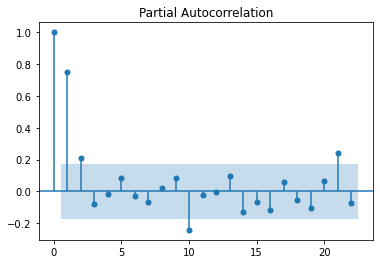

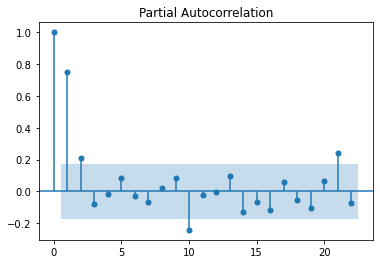

In [46]:
plot_pacf(df['seasonal first diff'].dropna())

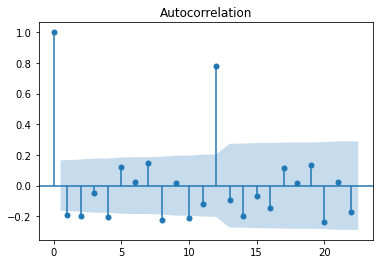

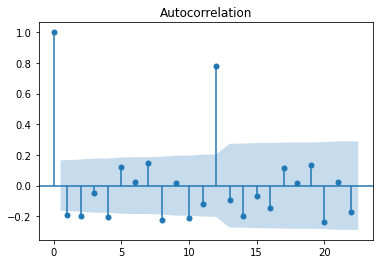

In [47]:
plot_acf(df['#Passengers second diff'].dropna())

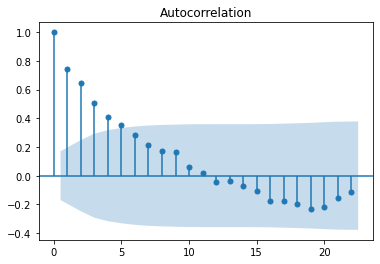

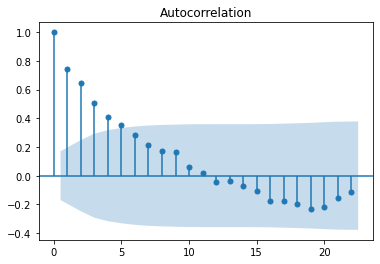

In [48]:
plot_acf(df['seasonal first diff'].dropna())

In [78]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['#Passengers'],order=(0,2,0),seasonal_order=(1,1,2,12))
result=model.fit()

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [79]:
result

In [80]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                             #Passengers   No. Observations:                  144
Model:             SARIMAX(0, 2, 0)x(1, 1, [1, 2], 12)   Log Likelihood                -570.452
Date:                                 Fri, 31 Dec 2021   AIC                           1148.904
Time:                                         00:09:40   BIC                           1160.374
Sample:                                              0   HQIC                          1153.565
                                                 - 144                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1900      1.817      0.105      0.917      -3.371       3.751
ma.S.L12      -0.4476      1.802     -0.248      0.804      -3.979       3.084
ma.S.L24      -0.0328      0.521     -0.063      0.950      -1.054       0.988
sigma2       375.8253     37.926      9.910      0.000     301.492     450.158
===================================================================================
Ljung-Box (L1) (Q):                  49.80   Jarque-Bera (JB):                38.73
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.76   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
df1['forecast']=result.predict(start=df.index[120],end=df.index[141])

In [84]:
df1

,#Passengers,#Passengers first diff,#Passengers second diff,seasonal first diff,forecast
Month,,,,,
2003-01-01,112,NaN,NaN,NaN,NaN
2003-02-01,118,6.0,NaN,NaN,NaN
2003-03-01,132,14.0,8.0,NaN,NaN
2003-04-01,129,-3.0,-17.0,NaN,NaN
2003-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
2015-08-01,606,-16.0,-103.0,47.0,649.626491
2015-09-01,508,-98.0,-82.0,45.0,490.734201
2015-10-01,461,-47.0,51.0,54.0,446.349215


In [76]:
len(df)

144

<AxesSubplot:xlabel='Month'>

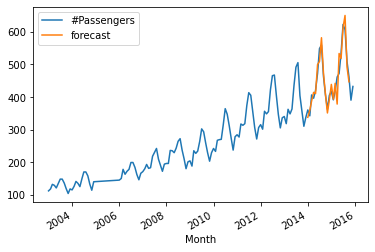

In [85]:
df[['#Passengers','forecast']].plot()

In [93]:
dates=({'DATE':['2003/1/2','2003/1/2','2003/1/2']})
df=pd.DataFrame(dates)
df

,DATE
0,2003/1/2
1,2003/1/2
2,2003/1/2


In [104]:
from pandas.tseries.offsets import DateOffset
future_date

[2]

       DATE
0  2003/1/2
1  2003/1/2
2  2003/1/2
